# Neural Networks for Data Science Applications

## Lab session 1: TensorFlow 2.0 basics & Automatic differentiation

**Contents of the lab session**:
* Linear algebra in TensorFlow.
* Automatic gradient computation with tf.GradientTape.
* Simple example of gradient descent.

In [0]:
# Install the latest version of TF
# The '!' sign means a command that is executed externally
!pip install tensorflow==2.0.0

### 1 - Linear algebra

In [28]:
import tensorflow as tf

In [29]:
# Check the version
tf.__version__

'2.0.0'

In [30]:
# Check whether a GPU is available
# Hint: try to enable one from Runtime >> Change Runtime Type in Colab, and installling tensorflow-gpu.
tf.test.is_gpu_available()

True

In [31]:
# Simple matrix in NumPy
import numpy as np
A = np.random.rand(3, 2)

In [32]:
A

array([[0.74938785, 0.0231844 ],
       [0.15683247, 0.35414634],
       [0.91603059, 0.58474034]])

In [33]:
# Similar sintax in TF
tf.random.normal((3, 2))

<tf.Tensor: id=119, shape=(3, 2), dtype=float32, numpy=
array([[-1.4990163 ,  0.27213487],
       [-1.3617032 , -0.14722687],
       [ 0.05711011, -1.3862321 ]], dtype=float32)>

In [34]:
# Default type is tf.float32, but you can force a different one
B = tf.ones((5, 4), dtype=tf.float64)

In [35]:
# Casting in TF
tf.cast(B, tf.int32)

<tf.Tensor: id=123, shape=(5, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])>

In [36]:
# NumPy --> TensorFlow
tf.constant(A)

<tf.Tensor: id=124, shape=(3, 2), dtype=float64, numpy=
array([[0.74938785, 0.0231844 ],
       [0.15683247, 0.35414634],
       [0.91603059, 0.58474034]])>

In [37]:
# TensorFlow --> NumPy
B.numpy()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [38]:
B.shape

TensorShape([5, 4])

In [39]:
# Simple indexing
print(B[0])
print(B[0, 3])
print(B[0:2])
print(B[-1])

tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(2, 4), dtype=float64)
tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float64)


In [40]:
# Getting summaries from an array (NumPy version)
A.sum(axis=0)

array([1.8222509 , 0.96207107])

In [41]:
# Getting summaries from an array (TensorFlow version)
tf.reduce_sum(B, axis=1)

<tf.Tensor: id=142, shape=(5,), dtype=float64, numpy=array([4., 4., 4., 4., 4.])>

In [42]:
# All operators are element-wise
B * B

<tf.Tensor: id=143, shape=(5, 4), dtype=float64, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])>

In [43]:
# Reshaping in NumPy
A.reshape(6, 1)

array([[0.74938785],
       [0.0231844 ],
       [0.15683247],
       [0.35414634],
       [0.91603059],
       [0.58474034]])

In [44]:
# Reshaping in TensorFlow
tf.reshape(B, (4, 5))

<tf.Tensor: id=145, shape=(4, 5), dtype=float64, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])>

In [45]:
# Broadcasting (once)
A = tf.random.uniform((3,))
B = tf.random.uniform((1, 3))
A + B

<tf.Tensor: id=160, shape=(1, 3), dtype=float32, numpy=array([[0.62116194, 0.5398861 , 0.41171944]], dtype=float32)>

In [46]:
# Broadcasting (twice)
A = tf.random.uniform((4, 3, 1))
B = tf.random.uniform((1, 3, 5))
A + B

<tf.Tensor: id=175, shape=(4, 3, 5), dtype=float32, numpy=
array([[[0.9486724 , 1.1885365 , 0.87226427, 1.0035003 , 1.0493634 ],
        [1.4289199 , 1.0050846 , 0.83817303, 1.3996103 , 0.8362688 ],
        [0.73816204, 0.6234211 , 1.0687822 , 0.8923527 , 1.2444386 ]],

       [[1.0563859 , 1.29625   , 0.9799777 , 1.1112138 , 1.1570768 ],
        [1.3357016 , 0.9118663 , 0.7449547 , 1.306392  , 0.74305046],
        [0.6507065 , 0.53596556, 0.9813267 , 0.8048972 , 1.1569831 ]],

       [[1.0514582 , 1.2913224 , 0.9750501 , 1.1062862 , 1.1521492 ],
        [1.1820742 , 0.7582389 , 0.5913273 , 1.1527646 , 0.58942306],
        [1.1646985 , 1.0499575 , 1.4953187 , 1.3188891 , 1.6709751 ]],

       [[0.87626755, 1.1161317 , 0.7998594 , 0.9310955 , 0.9769585 ],
        [0.98682034, 0.56298506, 0.39607346, 0.9575107 , 0.3941692 ],
        [0.34204364, 0.22730267, 0.6726638 , 0.4962343 , 0.84832025]]],
      dtype=float32)>

### 2 - Automatic differentiation

In [47]:
# Define a simple function
def fcn(x):
  return 2.0 * tf.cos(x)

In [48]:
# Plot the function (note: automatic NumPy -> TensorFlow conversion)
x_range = np.linspace(0, 5, 100)
y_range = fcn(x_range)

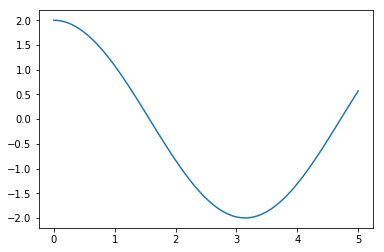

In [49]:
import matplotlib.pyplot as plt
plt.plot(x_range, y_range)

In [50]:
# Run the operations inside a tf.GradientTape
x = tf.constant(1.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = fcn(x)

In [24]:
# Get the gradient
g = tape.gradient(y, x)

In [51]:
# Check it is correct to numerical precision
# g == -2.0*tf.sin(x)
tf.reduce_all(tf.equal(g, -2.0*tf.sin(x))) # Alternative definition with TF functions

<tf.Tensor: id=217, shape=(), dtype=bool, numpy=True>

In [0]:
# Same, with tf.Variable (does not need to be watched)
x = tf.random.uniform((3, 2))
x = tf.Variable(x)

In [0]:
with tf.GradientTape() as tape:
  y = fcn(x)
  z = tf.reduce_sum(y) # Note: we need a scalar in output

In [0]:
tape.gradient(z, [x])

[<tf.Tensor: id=141, shape=(3, 2), dtype=float32, numpy=
 array([[-0.21220458, -0.819939  ],
        [-1.504415  , -0.1483928 ],
        [-1.0899347 , -1.2876378 ]], dtype=float32)>]

### 3 - Gradient Descent

In [0]:
x = tf.Variable(tf.ones(1))
x_history = [] # Evolution of x
y_history = [] # Evolution of the function
g_history = [] # Evolution of the gradient
for i in range(50):
  with tf.GradientTape() as tape:
      y = fcn(x)
      x_history.append(x.numpy())
      y_history.append(y.numpy())
  g = tape.gradient(y, x)
  g_history.append(g.numpy())
  x.assign_sub(0.05*g) # We cannot reassign a Variable with standard operators, otherwise it becomes a tensor

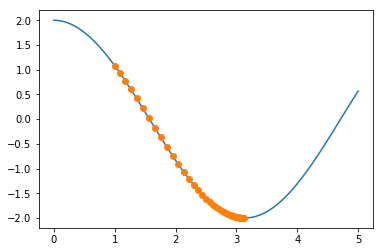

In [0]:
plt.plot(x_range, y_range)
plt.plot(x_history, fcn(x_history), 'o')

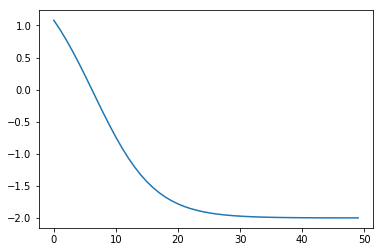

In [0]:
plt.plot(y_history)
plt.xlabel('Iteration')
plt.ylabel('Value of function')

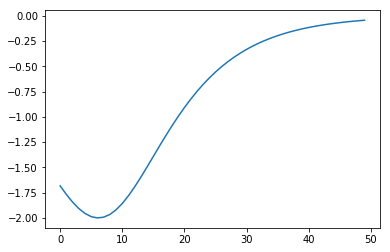

In [0]:
plt.plot(g_history)
plt.xlabel('Iteration')
plt.ylabel('Value of gradient')

### 4 - Advanced use cases

In [0]:
# Two variables!
v1 = tf.Variable(2.0)
v2 = tf.Variable(tf.ones(4))

In [0]:
# You can use conditional control flow (and other stuff) inside the GradientTape
use_sqrt = True
with tf.GradientTape() as tape:
  if use_sqrt:
    y = v1 + tf.reduce_sum(tf.sqrt(v2))
  else:
    y = v1 + tf.reduce_sum(v2)

In [0]:
tape.gradient(y, [v1, v2])

[<tf.Tensor: id=8749, shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: id=8753, shape=(4,), dtype=float32, numpy=array([0.5, 0.5, 0.5, 0.5], dtype=float32)>]

In [0]:
# Second-order derivatives
# Learn more: https://www.tensorflow.org/tutorials/customization/autodiff#higher-order_gradients
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
      y = tf.reduce_sum(tf.sqrt(v2))
  grad = tape.gradient(y, v2)
gradgrad = outer_tape.gradient(grad, v2)

In [0]:
gradgrad

<tf.Tensor: id=8798, shape=(4,), dtype=float32, numpy=array([-0.25, -0.25, -0.25, -0.25], dtype=float32)>

### Some reading material
* https://www.tensorflow.org/tutorials/customization/basics
* https://www.tensorflow.org/tutorials/customization/autodiff